In [1]:
# Load packages  
import numpy as np
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

In [2]:
data_default = pd.read_excel("../data/default of credit card clients.xls", header= 1, index_col= 0)
data_default.rename(columns={'default payment next month': 'DEFAULT' }, inplace=True)

In [3]:
data_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Data Set Information  

`list(data_default.columns)`  

**Target Variable**  
- `DEFAULT`  
  - `1`: Yes  
  - `0`: No  
  
**Explanatory Variables**  
- `LIMIT_BAL`  
  - Amount of given credit (Numeric)
- `SEX`  
  - Gender (Binary)  
    - `1`: male  
    - `2`: female
- `EDUCATION`  
  - Level of education (Categorical)  
    - `1`: Graduate school  
    - `2`: University  
    - `3`: High School  
    - `4`: Other  
- `MARRIAGE`  
  - Marital Status (Categorical)  
    - `1`: Married  
    - `2`: Single  
    - `3`: Other     
- `AGE`  (Numeric)  

*`PAY_X` (Categorial)*
- `PAY_0`  
  - Repayment status in September
- `PAY_2`  
  - Repayment status in August  
- `PAY_3`  
  - Repayment status in July  
- `PAY_4`  
  - Repayment status in June  
- `PAY_5`  
  - Repayment status in May  
- `PAY_6`  
  - Repayment status in April  
  
  
    - `-1`: pay duly  
    - `1`: payment delayed 1 month  
    - `2`: payment delayed 2 months
    -  `...`  
    - `9`: payment delayed 9 months or more  

*`BILL_AMTX` (Numeric)*  
- `BILL_AMT1`  
  - Bill amount in September  
- `BILL_AMT2`  
  - Bill amount in August  
- `BILL_AMT3`  
  - Bill amount in July  
- `BILL_AMT4`  
  - Bill amount in June  
- `BILL_AMT5`  
  - Bill amount in May  
- `BILL_AMT6`  
  - Bill amount in April  
  
*`PAY_AMTX` (Numeric)*
- `PAY_AMT1`  
  - Amount paid in September  
- `PAY_AMT2`  
  - Amount paid in August  
- `PAY_AMT3`  
  - Amount paid in July  
- `PAY_AMT4`  
  - Amount paid in June  
- `PAY_AMT5`  
  - Amount paid in May  
- `PAY_AMT6`  
  - Amount paid in April  

### Exploratory Data Analysis  

In [4]:
default_bal = pd.DataFrame(data_default['DEFAULT'].value_counts())
default_bal['Proportion'] = default_bal['DEFAULT'] / np.sum(default_bal['DEFAULT'])
default_bal

,DEFAULT,Proportion
0,23364,0.7788
1,6636,0.2212


- Unbalanced data set, signifacntly more customers who do not default compared to those that do default (Approx 3:1)

C:\Users\Brenden Everitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


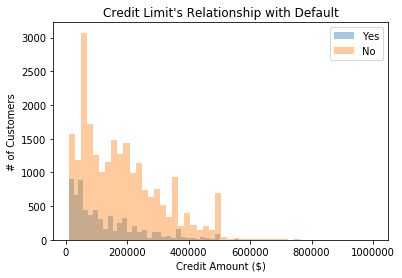

In [5]:
# LIMIT_BAL's relationship with default
sns.distplot(data_default.query('DEFAULT == 1')['LIMIT_BAL'], kde=False, label="Yes")
sns.distplot(data_default.query('DEFAULT == 0')['LIMIT_BAL'], kde=False, label="No")
plt.xlabel("Credit Amount ($)")
plt.ylabel("# of Customers")
plt.title("Credit Limit's Relationship with Default")
plt.legend()
plt.show()

- There is almost no difference between the distribution of the amount of credit between customer who default and customers who do not default  

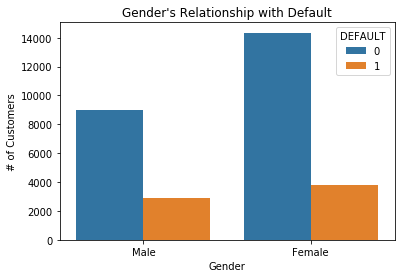

Proportion of males that default: 0.24
Proportion of females that default: 0.21


In [41]:
# SEX's relationship with default  
plot_sex = sns.countplot(x='SEX', hue='DEFAULT', data=data_default, )
plt.xlabel("Gender")
plt.ylabel("# of Customers")
plt.title("Gender's Relationship with Default")
plot_sex.set_xticklabels(["Male", "Female"])
plt.show()

print('Proportion of males that default: {}'.format(round(data_default.query('SEX == 1 and DEFAULT == 1').LIMIT_BAL.count()/ data_default.query('SEX == 1').LIMIT_BAL.count(),2)))
print('Proportion of females that default: {}'.format(round(data_default.query('SEX == 2 and DEFAULT == 1').LIMIT_BAL.count()/ data_default.query('SEX == 2').LIMIT_BAL.count(),2)))

- There is signifcantly more female's present in the dataset. Roughly the same number of females and males have defaulted, however, the proportion of males to default is higher than compared to females.  

In [42]:
data_default.EDUCATION.nunique()

7

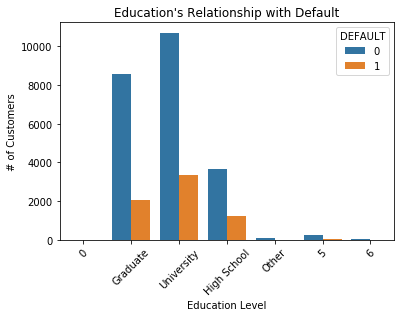

In [43]:
# Education's relationship with default  
plot_edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=data_default)
plt.xlabel("Education Level")
plt.ylabel("# of Customers")
plt.title("Education's Relationship with Default")
plot_edu.set_xticklabels(["0", "Graduate", "University", "High School", "Other", "5", "6"], rotation = 45)
plt.show()

- Some unaccounted for categorical levels present in the data. Potentially remove? Or add those rows to the `Other` category.

In [44]:
pd.DataFrame(data_default['EDUCATION'].value_counts(sort=False))

,EDUCATION
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


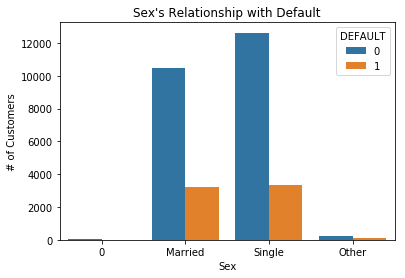

In [45]:
plot_mar = sns.countplot(x='MARRIAGE', hue='DEFAULT', data=data_default)
plt.xlabel("Sex")
plt.ylabel("# of Customers")
plt.title("Sex's Relationship with Default")
plot_mar.set_xticklabels(['0','Married','Single', 'Other'])
plt.show()

In [46]:
pd.DataFrame(data_default.MARRIAGE.value_counts(sort=False))

,MARRIAGE
0,54
1,13659
2,15964
3,323


- Some unaccounted for categories within marriage. Potentially remove? Or add to `Other` category.    

C:\Users\Brenden Everitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


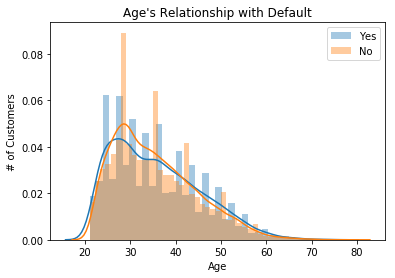

In [47]:
sns.distplot(data_default.query('DEFAULT == 1').AGE, kde=True, label="Yes")
sns.distplot(data_default.query('DEFAULT == 0').AGE, kde=True, label="No")
plt.xlabel("Age")
plt.ylabel("# of Customers")
plt.title("Age's Relationship with Default")
plt.legend()
plt.show()

- There is almost no difference between the distribution of age for customers who do default compared to customers who do not default. 

In [105]:
def CreateCategoricalComparisons(dataset, expl_vars, resp_var, rows, cols, ylabel = None):
    
    fig = plt.figure(figsize=(20,10))
        
    # Fill figure
    for idx, var in enumerate(expl_vars): 
        ax = fig.add_subplot(rows, cols, idx + 1)
        ax = sns.countplot(x=var, hue=resp_var, data=dataset)
        ax.set_xlabel(var)
        if ylabel is not None: ax.set_ylabel(ylabel)


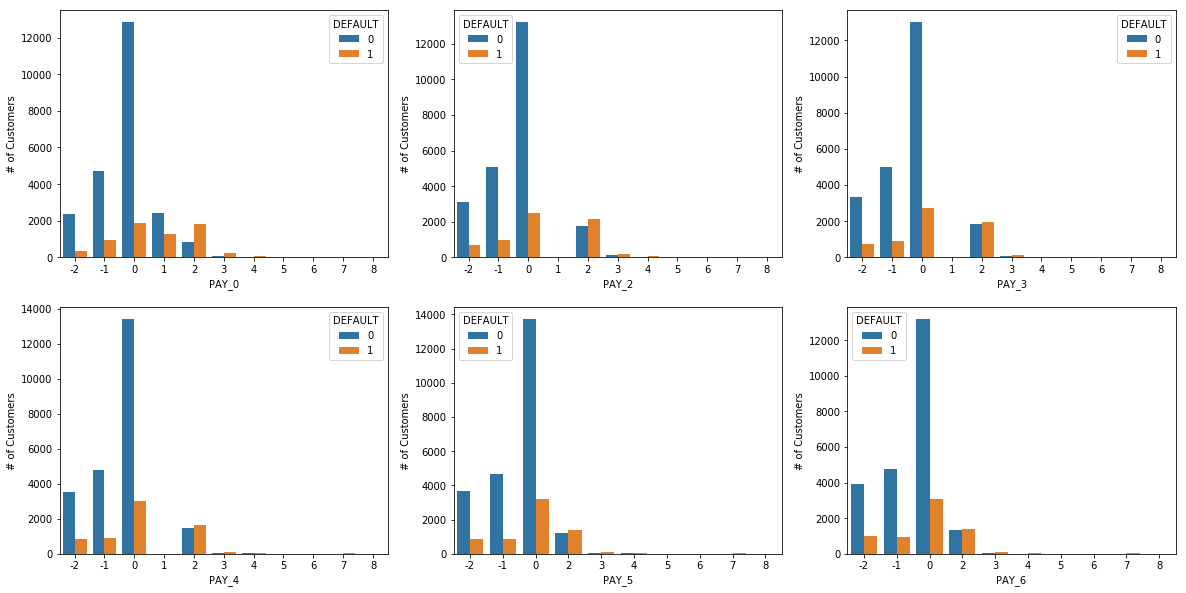

In [107]:
CreateCategoricalComparisons(data_default, ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'DEFAULT', 2, 3, '# of Customers')

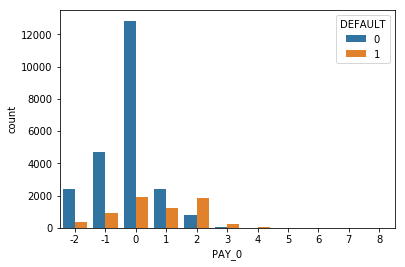

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax = sns.countplot(x='PAY_0', hue='DEFAULT', data=data_default)

In [61]:
tmp = [1,2,3,4,5,6]

In [64]:
tmp[5]

6